# Salary Predictions Based on Job Descriptions

### Problem Definition

As a Data Scientist in the recruitment industry, my goal is to build a system to predict salaries for a new set of job postings based on data provided on a set of historic job postings that include salaries.

Two CSV data files are available as a basis for training a machine learning model:

• train_features.csv: Each row represents metadata for an individual job posting.
The “jobId” column represents a unique identifier for the job posting. The remaining columns describe features of the job posting.
• train_salaries.csv: Each row associates a “jobId” with a “salary”.

The data upon which predictions should be made are stored in a further CSV data file:

• test_features.csv: Similar to train_features.csv, each row represents metadata for an individual job posting.

The output of my system should be a CSV file entitled test_salaries.csv where each row has the following format:

jobId, salary

### Library Imports

In [116]:
# Importing base libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# Importing scikit-learn pre-processing libraries.



# Importing scikit-learn machine learning libraries.



# Author information.
__author__ = "Ross MacDonald"
__email__ = "ross.macdonald@technologist.com"

 ### Reusable Functions

In [117]:
# Load CSV data file with completion dialogue and shape confirmation.
def load_file(file):
    df =  pd.read_csv(file)
    shape = df.shape
    print("Data file is loaded, the shape of the dataset = {}".format(shape))
    return df

# Show first and last lines (number of lines defined by x) of a defined dataframe (df).
def ends(df, x):
    print('{} rows x {} columns'.format(np.shape(df)[0],np.shape(df)[1]))
    return df.head(x).append(df.tail(x))

# Produce plots for feature versus target.
def plot_feature(df, feature, target):
    fig = plt.figure(figsize=(16,16))

    
    # Produce ditribution plot of feature.
    plt.subplot(2,1,1)
    plt.tight_layout()
    if df[feature].dtype=='int64' or df[feature].dtype =='float64':
        sns.distplot(df[feature])
    else:
        df[feature].value_counts().sort_values().plot()
    plt.title('Distribution of '+feature, fontsize=13, weight='bold')
    plt.xlabel(feature, fontsize=13, weight='bold')
    plt.ylabel('Counts', fontsize=13, weight='bold')
    if feature =='companyId':
        plt.xticks(rotation=90)
    else:
        plt.xticks(rotation=45)
    
    # Produce plot that shows feature correlation with target.
    plt.subplot(2,1,2)
    plt.tight_layout()
    if df[feature].dtype=='int64' or df[feature].dtype=='float64':
        sns.regplot(x=feature,y=target,data=df)
    else:
        order = df.groupby(feature).mean().sort_values(target).reset_index()[feature].values
        sns.boxplot(x=feature,y=target,data=df,order=order)
    plt.title('Correlation of '+feature+' with '+ target, fontsize=13, weight='bold')
    plt.xlabel(feature, fontsize=13, weight='bold')
    plt.ylabel(target, fontsize=13, weight='bold')
    if feature =='companyId':
        plt.xticks(rotation=90)
    else:
        plt.xticks(rotation=45)

### Load the Data

In [118]:
# Load the data into pandas dataframes (csv files for training and test data).
train_feature_df = load_file('data/train_features.csv')
train_target_df = load_file('data/train_salaries.csv')
test_df = load_file('data/test_features.csv')

Data file is loaded, the shape of the dataset = (1000000, 8)
Data file is loaded, the shape of the dataset = (1000000, 2)
Data file is loaded, the shape of the dataset = (1000000, 8)


In [119]:
# Merge the data on jobId to get a single training dataset (includes features and target).
train_df = pd.merge(train_feature_df,train_target_df,how="inner",on="jobId")

In [120]:
# Initial check of top 10 rows of train_df to confirm load and get an initial view on data / types.
train_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,COMP15,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,JOB1362684407693,COMP15,CFO,NONE,NONE,HEALTH,23,24,178
7,JOB1362684407694,COMP24,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,COMP20,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,JOB1362684407696,COMP41,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


In [121]:
# Initial check of top 10 rows of test_feature_df to confirm load and get an initial view on data / types.
test_df.head(10)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44
5,JOB1362685407692,COMP40,CTO,MASTERS,COMPSCI,FINANCE,6,23
6,JOB1362685407693,COMP32,SENIOR,MASTERS,COMPSCI,SERVICE,6,32
7,JOB1362685407694,COMP11,CEO,BACHELORS,BIOLOGY,SERVICE,9,73
8,JOB1362685407695,COMP39,MANAGER,DOCTORAL,PHYSICS,HEALTH,6,78
9,JOB1362685407696,COMP22,VICE_PRESIDENT,NONE,NONE,AUTO,23,97


In [122]:
# Get information on the train_feature_df dataframe. Ensure data types and number of entries per column are as expected.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [123]:
# Get information on the train_feature_df dataframe. Ensure data types and number of entries per column are as expected.
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


### Clean the Data

In [124]:
# Check for duplicate rows in train_df.
print("Number of duplicated rows = {}".format(train_df.duplicated().sum()))

Number of duplicated rows = 0


In [125]:
# Check for duplicate rows in train_df.
print("Number of duplicated rows = {}".format(train_df.duplicated().sum()))

Number of duplicated rows = 0


In [126]:
# Check for null values in the columns of train_df.
train_df.isnull().sum().to_frame('Null Entries')

,Null Entries
jobId,0
companyId,0
jobType,0
degree,0
major,0
industry,0
yearsExperience,0
milesFromMetropolis,0
salary,0


In [127]:
# Check for null values in the columns of test_df.
test_df.isnull().sum().to_frame('Null Entries')

,Null Entries
jobId,0
companyId,0
jobType,0
degree,0
major,0
industry,0
yearsExperience,0
milesFromMetropolis,0


##### There are no duplicates or null entries in the data, so no need to drop rows / entries or subsitute any values. 

In [128]:
# Get the column names for numerical columns from train_df to enable us to filter for invalid values. 
print(train_df.select_dtypes(include=['float64', 'int64']).columns.values)

['yearsExperience' 'milesFromMetropolis' 'salary']


In [129]:
# Having found the column names for numerical columns from train_df, find rows that contain invalid values (i.e. <0 or <=0).
print(train_df[(train_df['yearsExperience'] < 0) | (train_df['milesFromMetropolis'] < 0) | (train_df['salary'] <= 0)])

                   jobId companyId         jobType       degree        major  \
30559   JOB1362684438246    COMP44          JUNIOR     DOCTORAL         MATH   
495984  JOB1362684903671    COMP34          JUNIOR         NONE         NONE   
652076  JOB1362685059763    COMP25             CTO  HIGH_SCHOOL         NONE   
816129  JOB1362685223816    COMP42         MANAGER     DOCTORAL  ENGINEERING   
828156  JOB1362685235843    COMP40  VICE_PRESIDENT      MASTERS  ENGINEERING   

       industry  yearsExperience  milesFromMetropolis  salary  
30559      AUTO               11                    7       0  
495984      OIL                1                   25       0  
652076     AUTO                6                   60       0  
816129  FINANCE               18                    6       0  
828156      WEB                3                   29       0  


In [130]:
# Remove the rows that contain invalid data from the train_df dataframe (i.e. salary was invalid in all cases, thus only include rows with salaries more than 0).
train_df = train_df[train_df.salary > 0]

In [131]:
# Check dataframe information to confirm that the expected rows have been dropped.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999995 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  999995 non-null object
companyId              999995 non-null object
jobType                999995 non-null object
degree                 999995 non-null object
major                  999995 non-null object
industry               999995 non-null object
yearsExperience        999995 non-null int64
milesFromMetropolis    999995 non-null int64
salary                 999995 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [132]:
# Reset the index of train_df after dropping the invalid values and print head and tail (using function ends) to confirm.
# reindex. Makes rows sequential to prevent any misunderstanding in subsequent analysis.
train_df = train_df.reset_index(drop=True)
ends(train_df, 3)

999995 rows x 9 columns


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
999992,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999993,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149
999994,JOB1362685407686,COMP59,JUNIOR,BACHELORS,NONE,EDUCATION,20,11,88


##### Invalid numerical entries have been dropped from the train_df dataframe, ensuring only valid data informs the prediction model / system. Index has been reset to prevent any misunderstanding (due to non-sequential rows in data) in any further analysis.

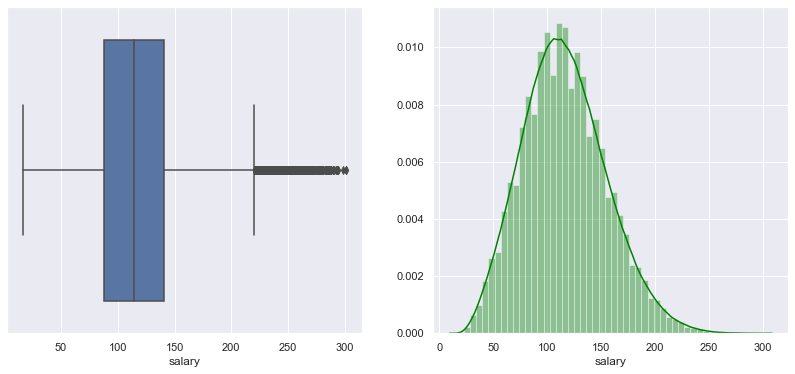

In [133]:
# Visualize target variable (salary).
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(train_df.salary)
plt.subplot(1,2,2)
sns.distplot(train_df.salary, bins=50 , color = 'green')
plt.show()

##### From initially observing the data graphically, it appears that there are outliers on the upper end (invalid zero entries have been removed, these would have been lower end outliers). My next action based on this insight is to use summary statistics and calculated IQR to delve into the outliers further.

In [134]:
# Generate summary statistics and IQR for the training data train_df. Use IQR to calculate the upper and lower limits.
train_df.salary.describe()
summary_stats = train_df.salary.describe()
print(summary_stats)
IQR = summary_stats['75%'] - summary_stats['25%']
upper = summary_stats['75%'] + 1.5 * IQR
lower = summary_stats['25%'] - 1.5 * IQR
print('The upper and lower limits calculated to confirm suspected outliers are {} and {}.'.format(upper, lower))

count    999995.000000
mean        116.062398
std          38.717163
min          17.000000
25%          88.000000
50%         114.000000
75%         141.000000
max         301.000000
Name: salary, dtype: float64
The upper and lower limits calculated to confirm suspected outliers are 220.5 and 8.5.


##### The summary statistics allow us to access the 25th and 75th percentiles of the salary column of train_df. IQR is calculated and presented above by subtracting the 75th percentile from the 25th percentile value. The IQR value is then used to calculate the lower limit and the upper limit of the salary column data, any data lying outside of these limits can be considered an outlier.

In [135]:
# Confirm for sure that there are no outliers (rows) equal to or below the lower limit.
train_df[train_df.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary


In [136]:
# Filter the train_df dataframe to show the rows that contain a salary more than the upper limit. 
train_df[train_df.salary > 220.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225
966,JOB1362684408653,COMP32,CEO,DOCTORAL,ENGINEERING,FINANCE,23,11,247
986,JOB1362684408673,COMP37,CFO,HIGH_SCHOOL,NONE,FINANCE,24,20,229
1211,JOB1362684408898,COMP24,CTO,DOCTORAL,BUSINESS,FINANCE,5,46,232
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
1413,JOB1362684409100,COMP56,VICE_PRESIDENT,MASTERS,MATH,WEB,24,15,241


In [137]:
# Calculate the upper limit outliers count as a percentage of the salary count (calculate salary and outlier count first).
training_salary_count = train_df.salary.count()
upper_outliers_count = train_df[train_df.salary > 220.5].salary.count()
upper_outlier_percentage = upper_outliers_count / training_salary_count * 100
upper_outlier_percentage = upper_outlier_percentage.round(2)
print('The upper outliers count ({}) is {}% of the salary count ({}).'.format(upper_outliers_count, upper_outlier_percentage, training_salary_count))

The upper outliers count (7117) is 0.71% of the salary count (999995).


##### The upper outliers constitute 0.71% of the data. This is a relatively low volume of data (7117 rows), given the large data set we have (999995 rows). My next course of action is to remove the outlier rows in an effort to increase the quality of the predictions going forward. For guidance on my thought process and justification for removing the outliers see https://humansofdata.atlan.com/2018/03/when-delete-outliers-dataset/.

In [138]:
# Remove the upper outliers from the training data, reindex the training data and output head and tail to confirm rows have been dropped.
# Drop jobId column as it is a unique identifier and will not contribute to prediction going forward
train_df = train_df[train_df.salary <= 220.5]
train_df.drop('jobId', axis=1, inplace=True)
train_df = train_df.reset_index(drop=True)
ends(train_df, 3)

992878 rows x 8 columns


,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
992875,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
992876,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149
992877,COMP59,JUNIOR,BACHELORS,NONE,EDUCATION,20,11,88


##### Data cleansing steps are complete. Invalid data has been removed and outlier analysis and removal has been carried out.

### Explore the data (EDA)

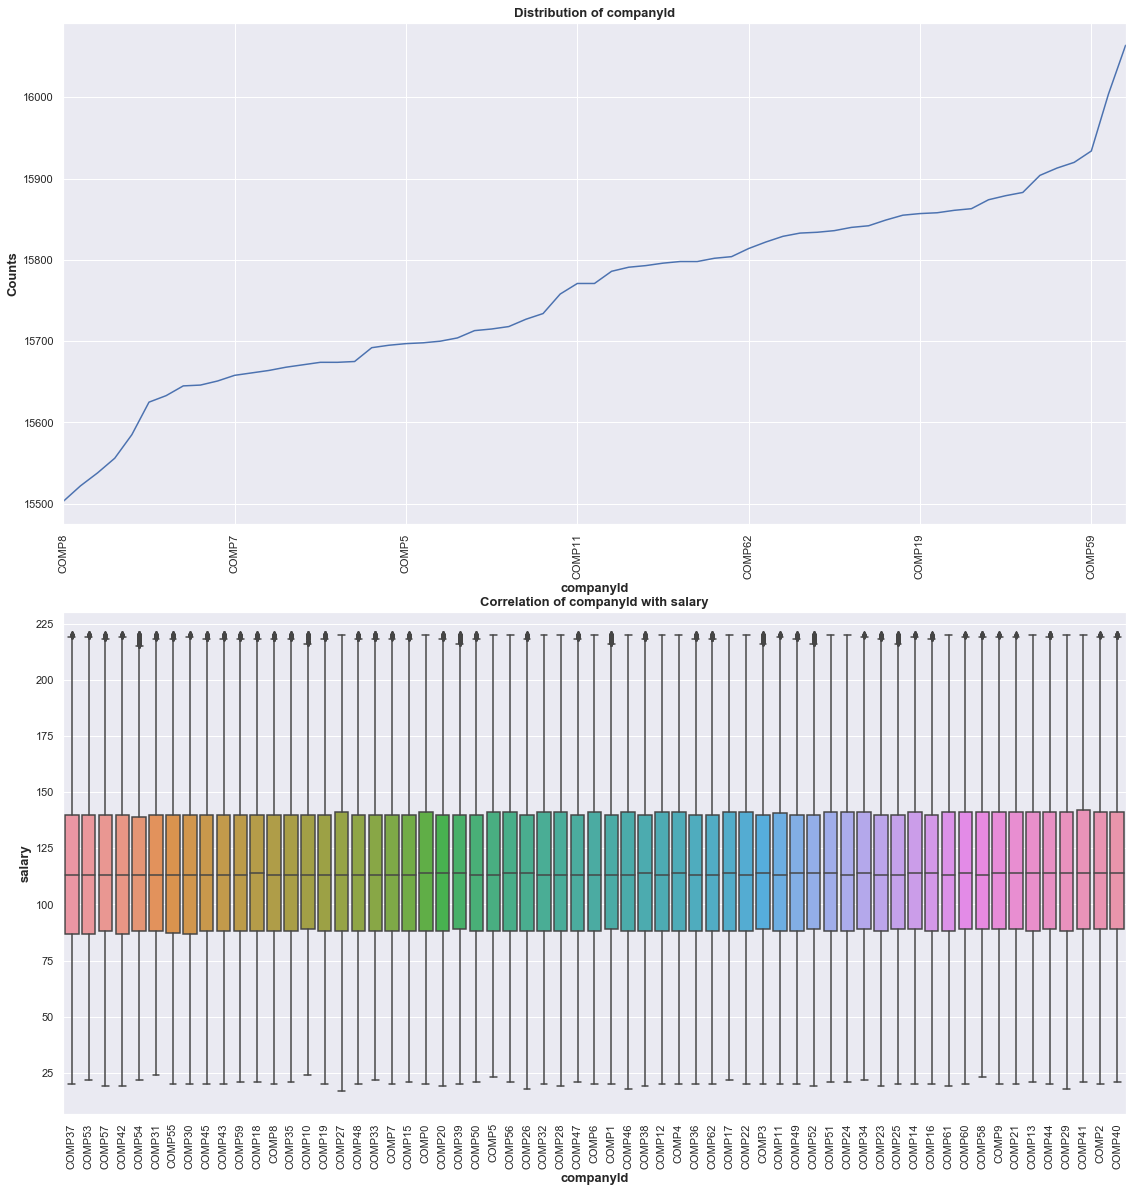

In [139]:
plot_feature(train_df,'companyId','salary')

##### The plots for companyId illustrate that there is no correlation between companyId and salary. The IQR's are similar across companies. This suggests companyId would not be a candidate for predicting salary.

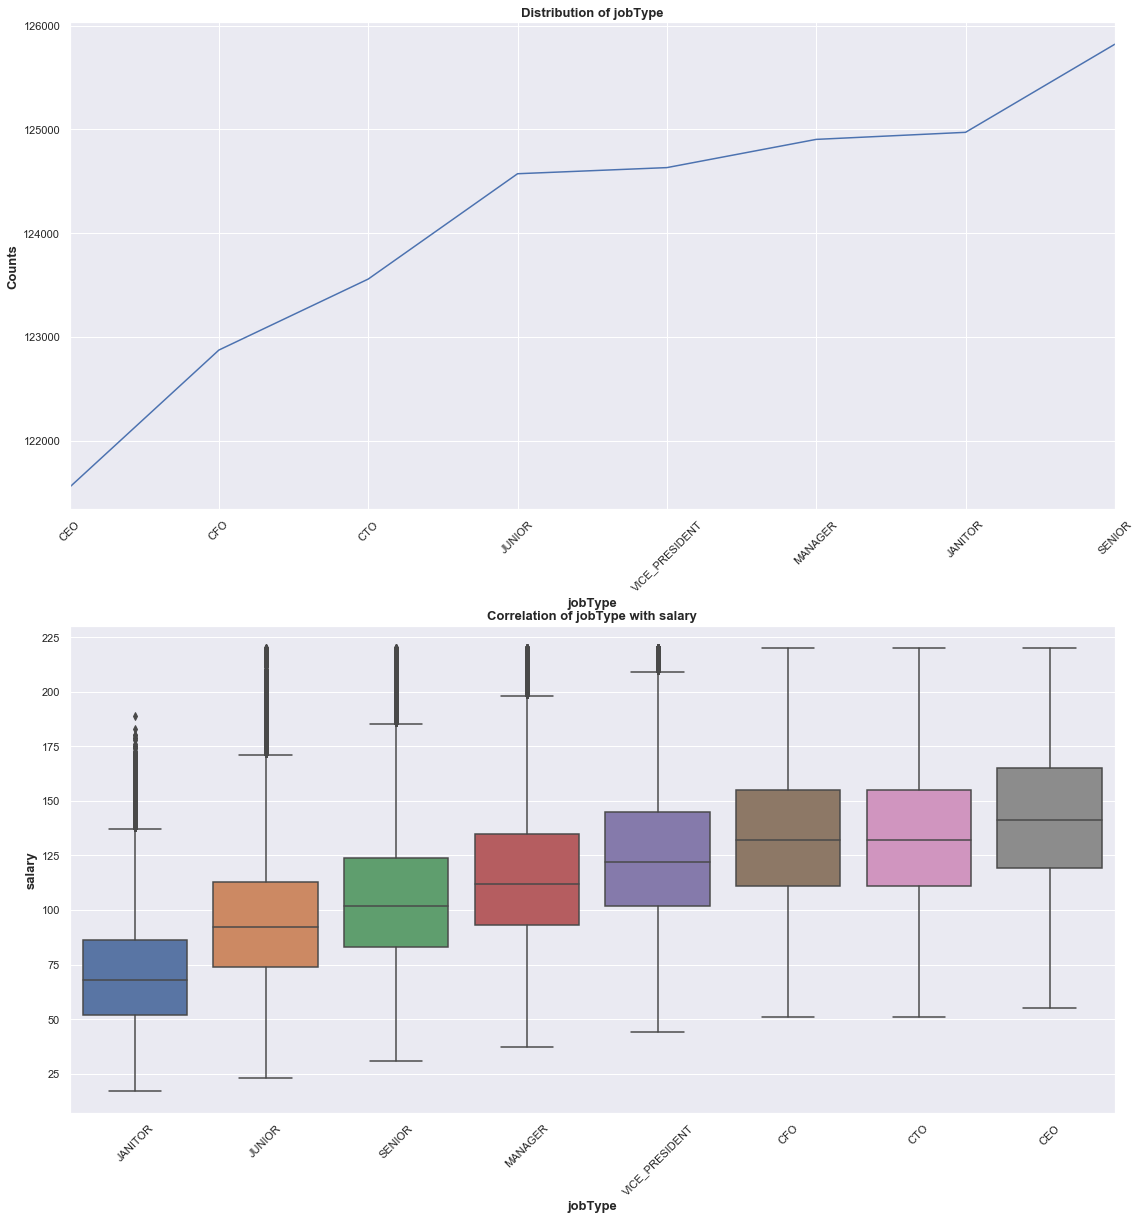

In [140]:
plot_feature(train_df,'jobType','salary')

##### The plots for jobType illustrate that there is a correlation between jobType and salary. The IQR's differ across jobTypes. As perhaps expected, CEO are paid highest (at the top of the IQR) and janitors are paid least (at the bottom of the IQR). Salary appears to adhere to jobType seniority, this suggests jobType may be a good candidate for predicting salary.

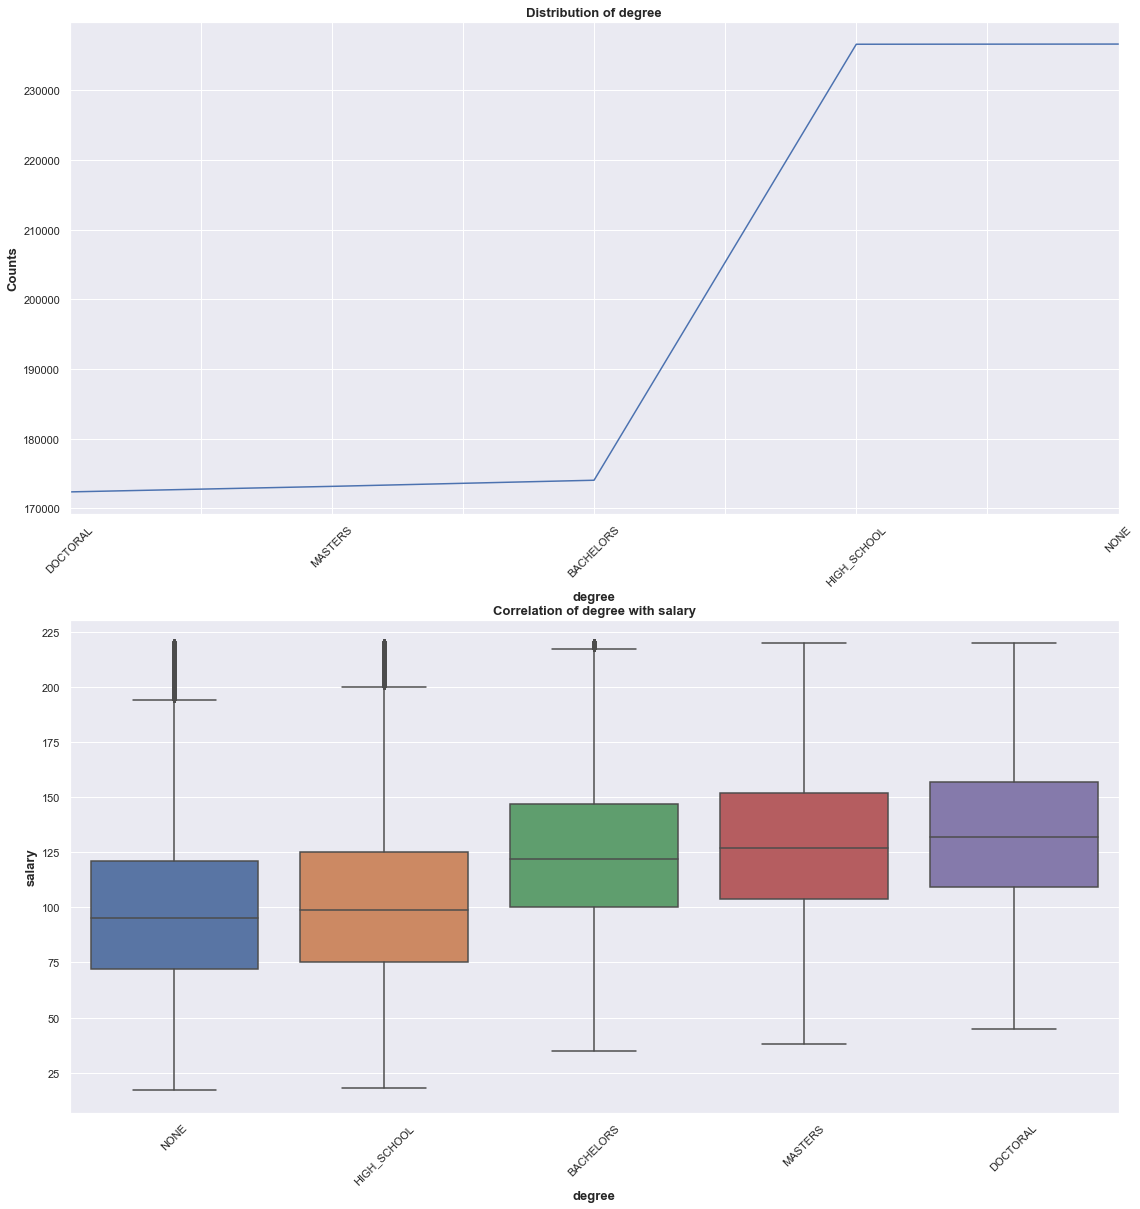

In [141]:
plot_feature(train_df,'degree','salary')

##### The plots for degree illustrate that there is a correlation between degree and salary. The IQR's differ across degree. Doctoral level employees are paid highest (at the top of the IQR) and employees without a degree are paid least (at the bottom of the IQR - only a little lower than high school educated employees). Salary appears to adhere to education level, this suggests degree may be a good candidate for predicting salary.

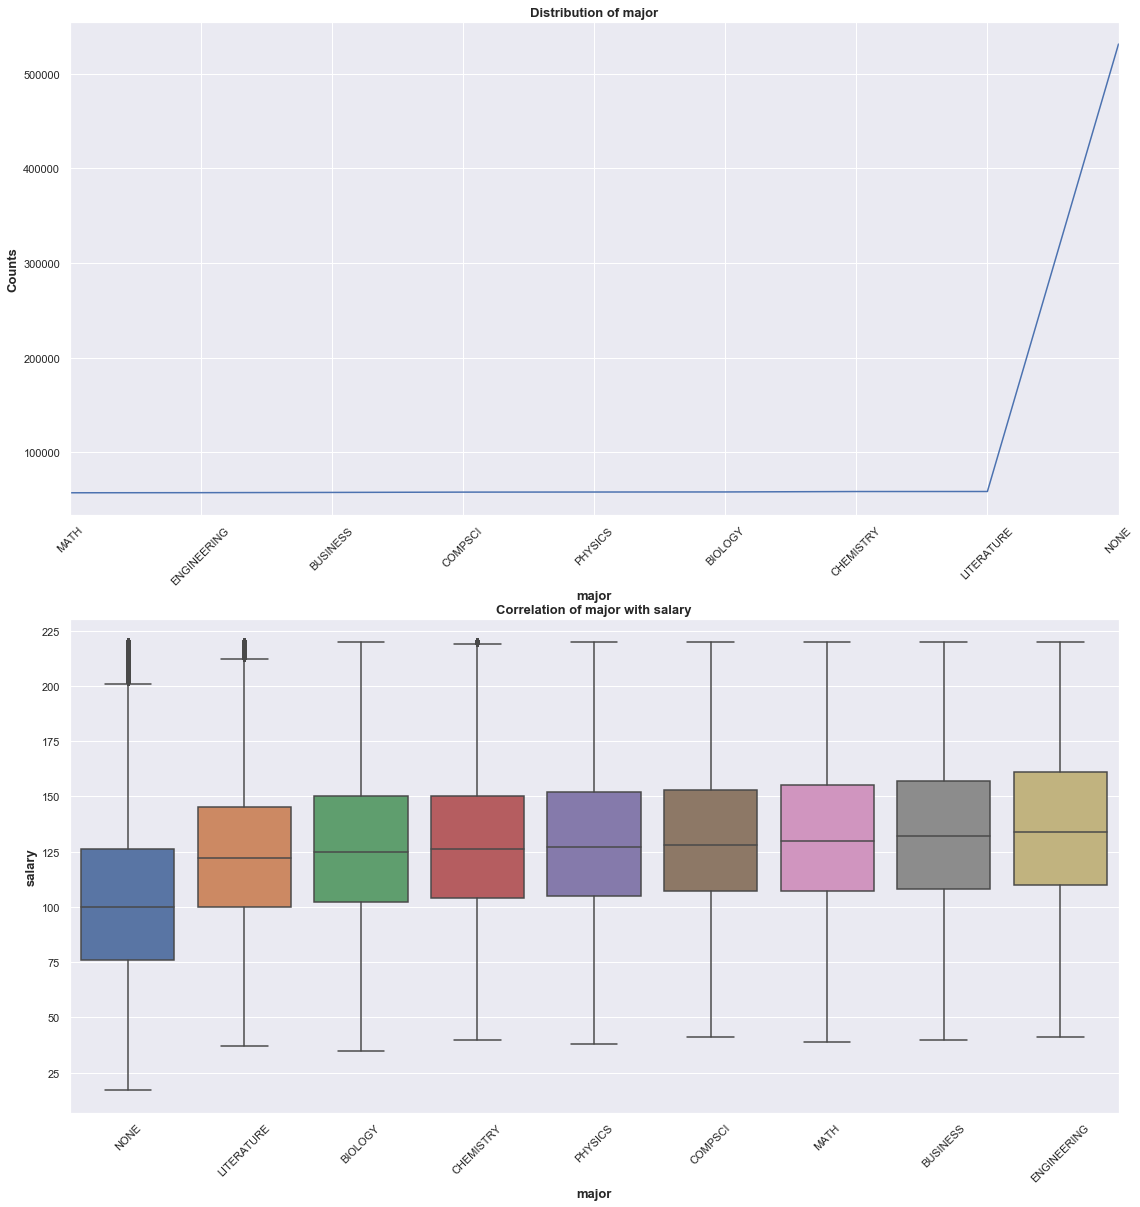

In [142]:
plot_feature(train_df,'major','salary')

##### The plots for major illustrate that there is a correlation between major and salary. The IQR's differ across major. Engineering major employees are paid highest (at the top of the IQR) and employees without a major are paid least (at the bottom of the IQR - unclear whether this is empoyees with degrees without majors, without degrees or a combination of both). Salary appears to adhere to degree major, this suggests major may be a good candidate for predicting salary.

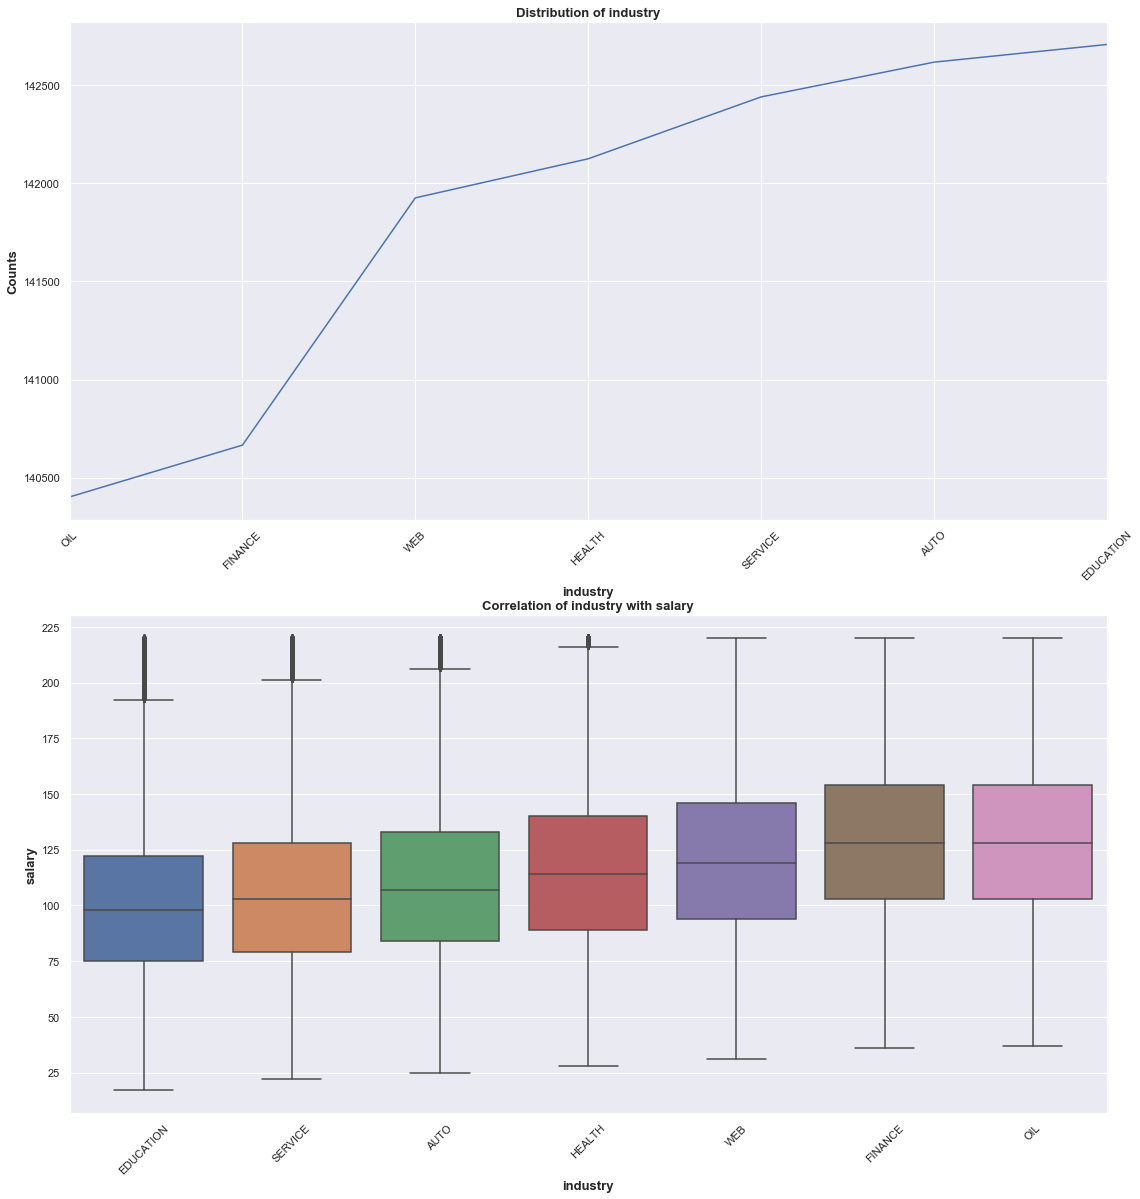

In [143]:
plot_feature(train_df,'industry','salary')

##### The plots for industry illustrate that there is a correlation between industry and salary. The IQR's differ across industry. Oil, and finance employees are paid highest (at the top of the IQR) and employees in education are paid least (at the bottom of the IQR. This notable differences between industry suggest it may be a good candidate for predicting salary.

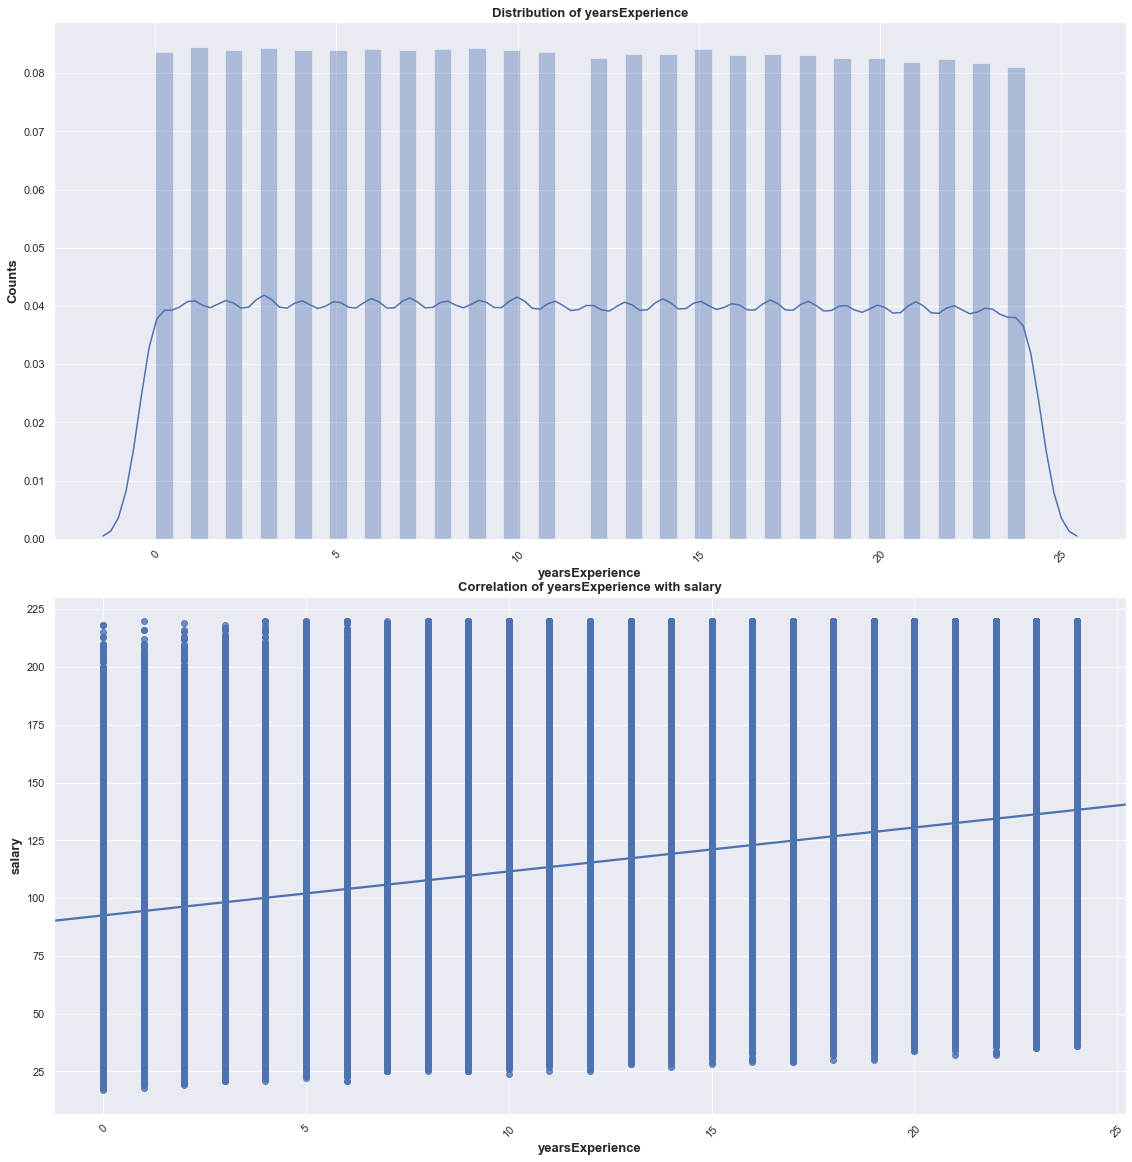

In [144]:
plot_feature(train_df,'yearsExperience','salary')

##### The plots for yearsExperience illustrate that there is a correlation between yearsExperience and salary. The trend is that the mean salary increases as yearsExperience increase. This suggests that yearsExperience may be a good candidate for predicting salary.

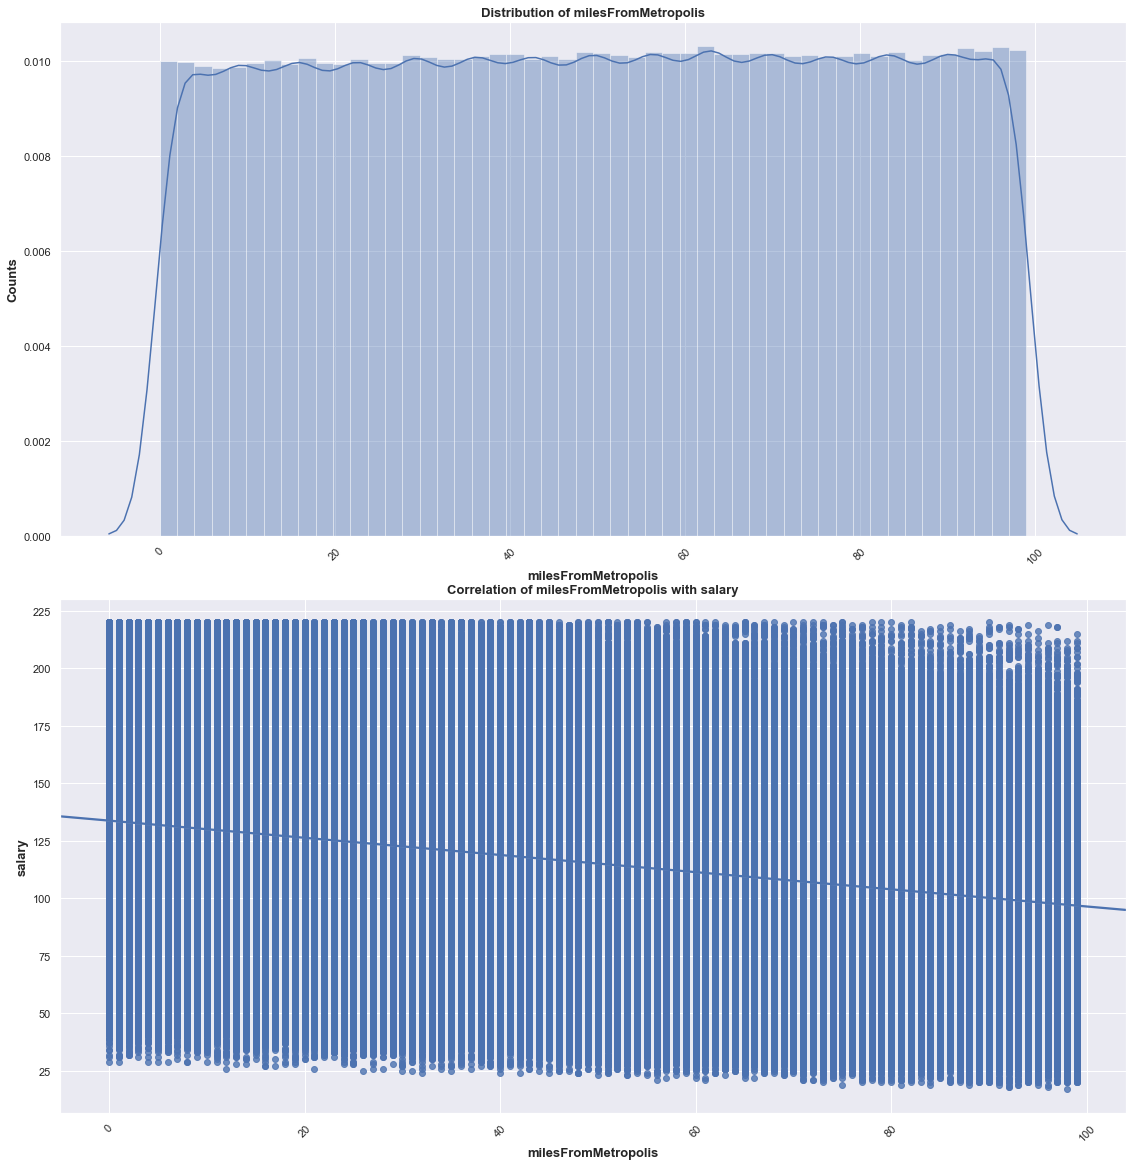

In [145]:
plot_feature(train_df,'milesFromMetropolis','salary')

##### The plots for milesFromMetropolis illustrate that there is a correlation between milesFromMetropolis and salary. The trend is that the mean salary decreases as milesFromMetropolis increase. This suggests that milesFromMetropolis may be a good candidate for predicting salary.

In [146]:
# Based on the above analysis, companyId will be dropped, as it will not be taken forward as a feature for prediction.
train_df.drop('companyId', axis=1, inplace=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992878 entries, 0 to 992877
Data columns (total 7 columns):
jobType                992878 non-null object
degree                 992878 non-null object
major                  992878 non-null object
industry               992878 non-null object
yearsExperience        992878 non-null int64
milesFromMetropolis    992878 non-null int64
salary                 992878 non-null int64
dtypes: int64(3), object(4)
memory usage: 53.0+ MB


In [ ]:
# Encode for heatmap
# https://github.com/ankur26/SalaryPrediction/blob/master/Salary%20Prediction%20Notebook.ipynb

In [148]:
# One-hot encode categorical data and assign to new train_df_cat dataset.
train_df_cat = pd.get_dummies(train_df, sparse=True)

In [149]:
# Check the resulting datafarme.
train_df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992878 entries, 0 to 992877
Data columns (total 32 columns):
yearsExperience           -992878 non-null int64
milesFromMetropolis       -992878 non-null int64
salary                    -992878 non-null int64
jobType_CEO               -992878 non-null Sparse[uint8, 0]
jobType_CFO               -992878 non-null Sparse[uint8, 0]
jobType_CTO               -992878 non-null Sparse[uint8, 0]
jobType_JANITOR           -992878 non-null Sparse[uint8, 0]
jobType_JUNIOR            -992878 non-null Sparse[uint8, 0]
jobType_MANAGER           -992878 non-null Sparse[uint8, 0]
jobType_SENIOR            -992878 non-null Sparse[uint8, 0]
jobType_VICE_PRESIDENT    -992878 non-null Sparse[uint8, 0]
degree_BACHELORS          -992878 non-null Sparse[uint8, 0]
degree_DOCTORAL           -992878 non-null Sparse[uint8, 0]
degree_HIGH_SCHOOL        -992878 non-null Sparse[uint8, 0]
degree_MASTERS            -992878 non-null Sparse[uint8, 0]
degree_NONE           

,yearsExperience,milesFromMetropolis,salary,jobType_CEO,jobType_CFO,jobType_CTO,jobType_JANITOR,jobType_JUNIOR,jobType_MANAGER,jobType_SENIOR,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
yearsExperience,1.000000,0.008685,0.364983,-0.007016,-0.002417,-0.001146,0.001828,0.002930,0.001898,0.002977,...,-0.002012,0.006350,-0.001479,0.001043,0.003257,-0.002535,-0.000061,-0.003203,0.002614,-0.001152
milesFromMetropolis,0.008685,1.000000,-0.286955,0.005773,0.002581,0.002626,-0.003834,-0.000895,-0.002304,-0.001879,...,0.000919,-0.007148,0.001305,-0.001401,-0.001671,0.002935,-0.001241,0.003020,-0.001487,-0.000120
salary,0.364983,-0.286955,1.000000,0.275709,0.190817,0.191774,-0.449114,-0.200937,-0.000470,-0.099414,...,0.109600,-0.367405,0.092945,-0.066105,-0.173280,0.150526,0.000055,0.151163,-0.119372,0.058960
jobType_CEO,-0.007016,0.005773,0.275709,1.000000,-0.140364,-0.140810,-0.141728,-0.141469,-0.141684,-0.142279,...,0.010329,-0.046418,0.014195,0.002318,0.002518,-0.001927,-0.000897,-0.002834,0.001317,-0.000526
jobType_CFO,-0.002417,0.002581,0.190817,-0.140364,1.000000,-0.141681,-0.142605,-0.142345,-0.142561,-0.143159,...,0.013781,-0.049101,0.013072,-0.000919,-0.000179,-0.000386,0.002258,-0.001530,-0.000187,0.000936
jobType_CTO,-0.001146,0.002626,0.191774,-0.140810,-0.141681,1.000000,-0.143058,-0.142796,-0.143013,-0.143613,...,0.014256,-0.049774,0.012966,-0.000101,0.001176,-0.001784,-0.001249,0.000814,0.001597,-0.000459
jobType_JANITOR,0.001828,-0.003834,-0.449114,-0.141728,-0.142605,-0.143058,1.000000,-0.143728,-0.143946,-0.144550,...,-0.093633,0.353566,-0.094324,0.001137,-0.000788,0.000816,-0.001524,0.000200,-0.000653,0.000818
jobType_JUNIOR,0.002930,-0.000895,-0.200937,-0.141469,-0.142345,-0.142796,-0.143728,1.000000,-0.143683,-0.144286,...,0.013968,-0.052150,0.012763,-0.000706,0.000609,0.000892,0.001062,-0.001149,-0.000973,0.000263
jobType_MANAGER,0.001898,-0.002304,-0.000470,-0.141684,-0.142561,-0.143013,-0.143946,-0.143683,1.000000,-0.144505,...,0.013952,-0.052226,0.014938,0.001386,-0.001578,0.001623,-0.001336,0.001034,-0.000500,-0.000616
jobType_SENIOR,0.002977,-0.001879,-0.099414,-0.142279,-0.143159,-0.143613,-0.144550,-0.144286,-0.144505,1.000000,...,0.012390,-0.054465,0.014188,-0.002207,-0.000078,0.000412,-0.000573,0.003223,-0.000313,-0.000442


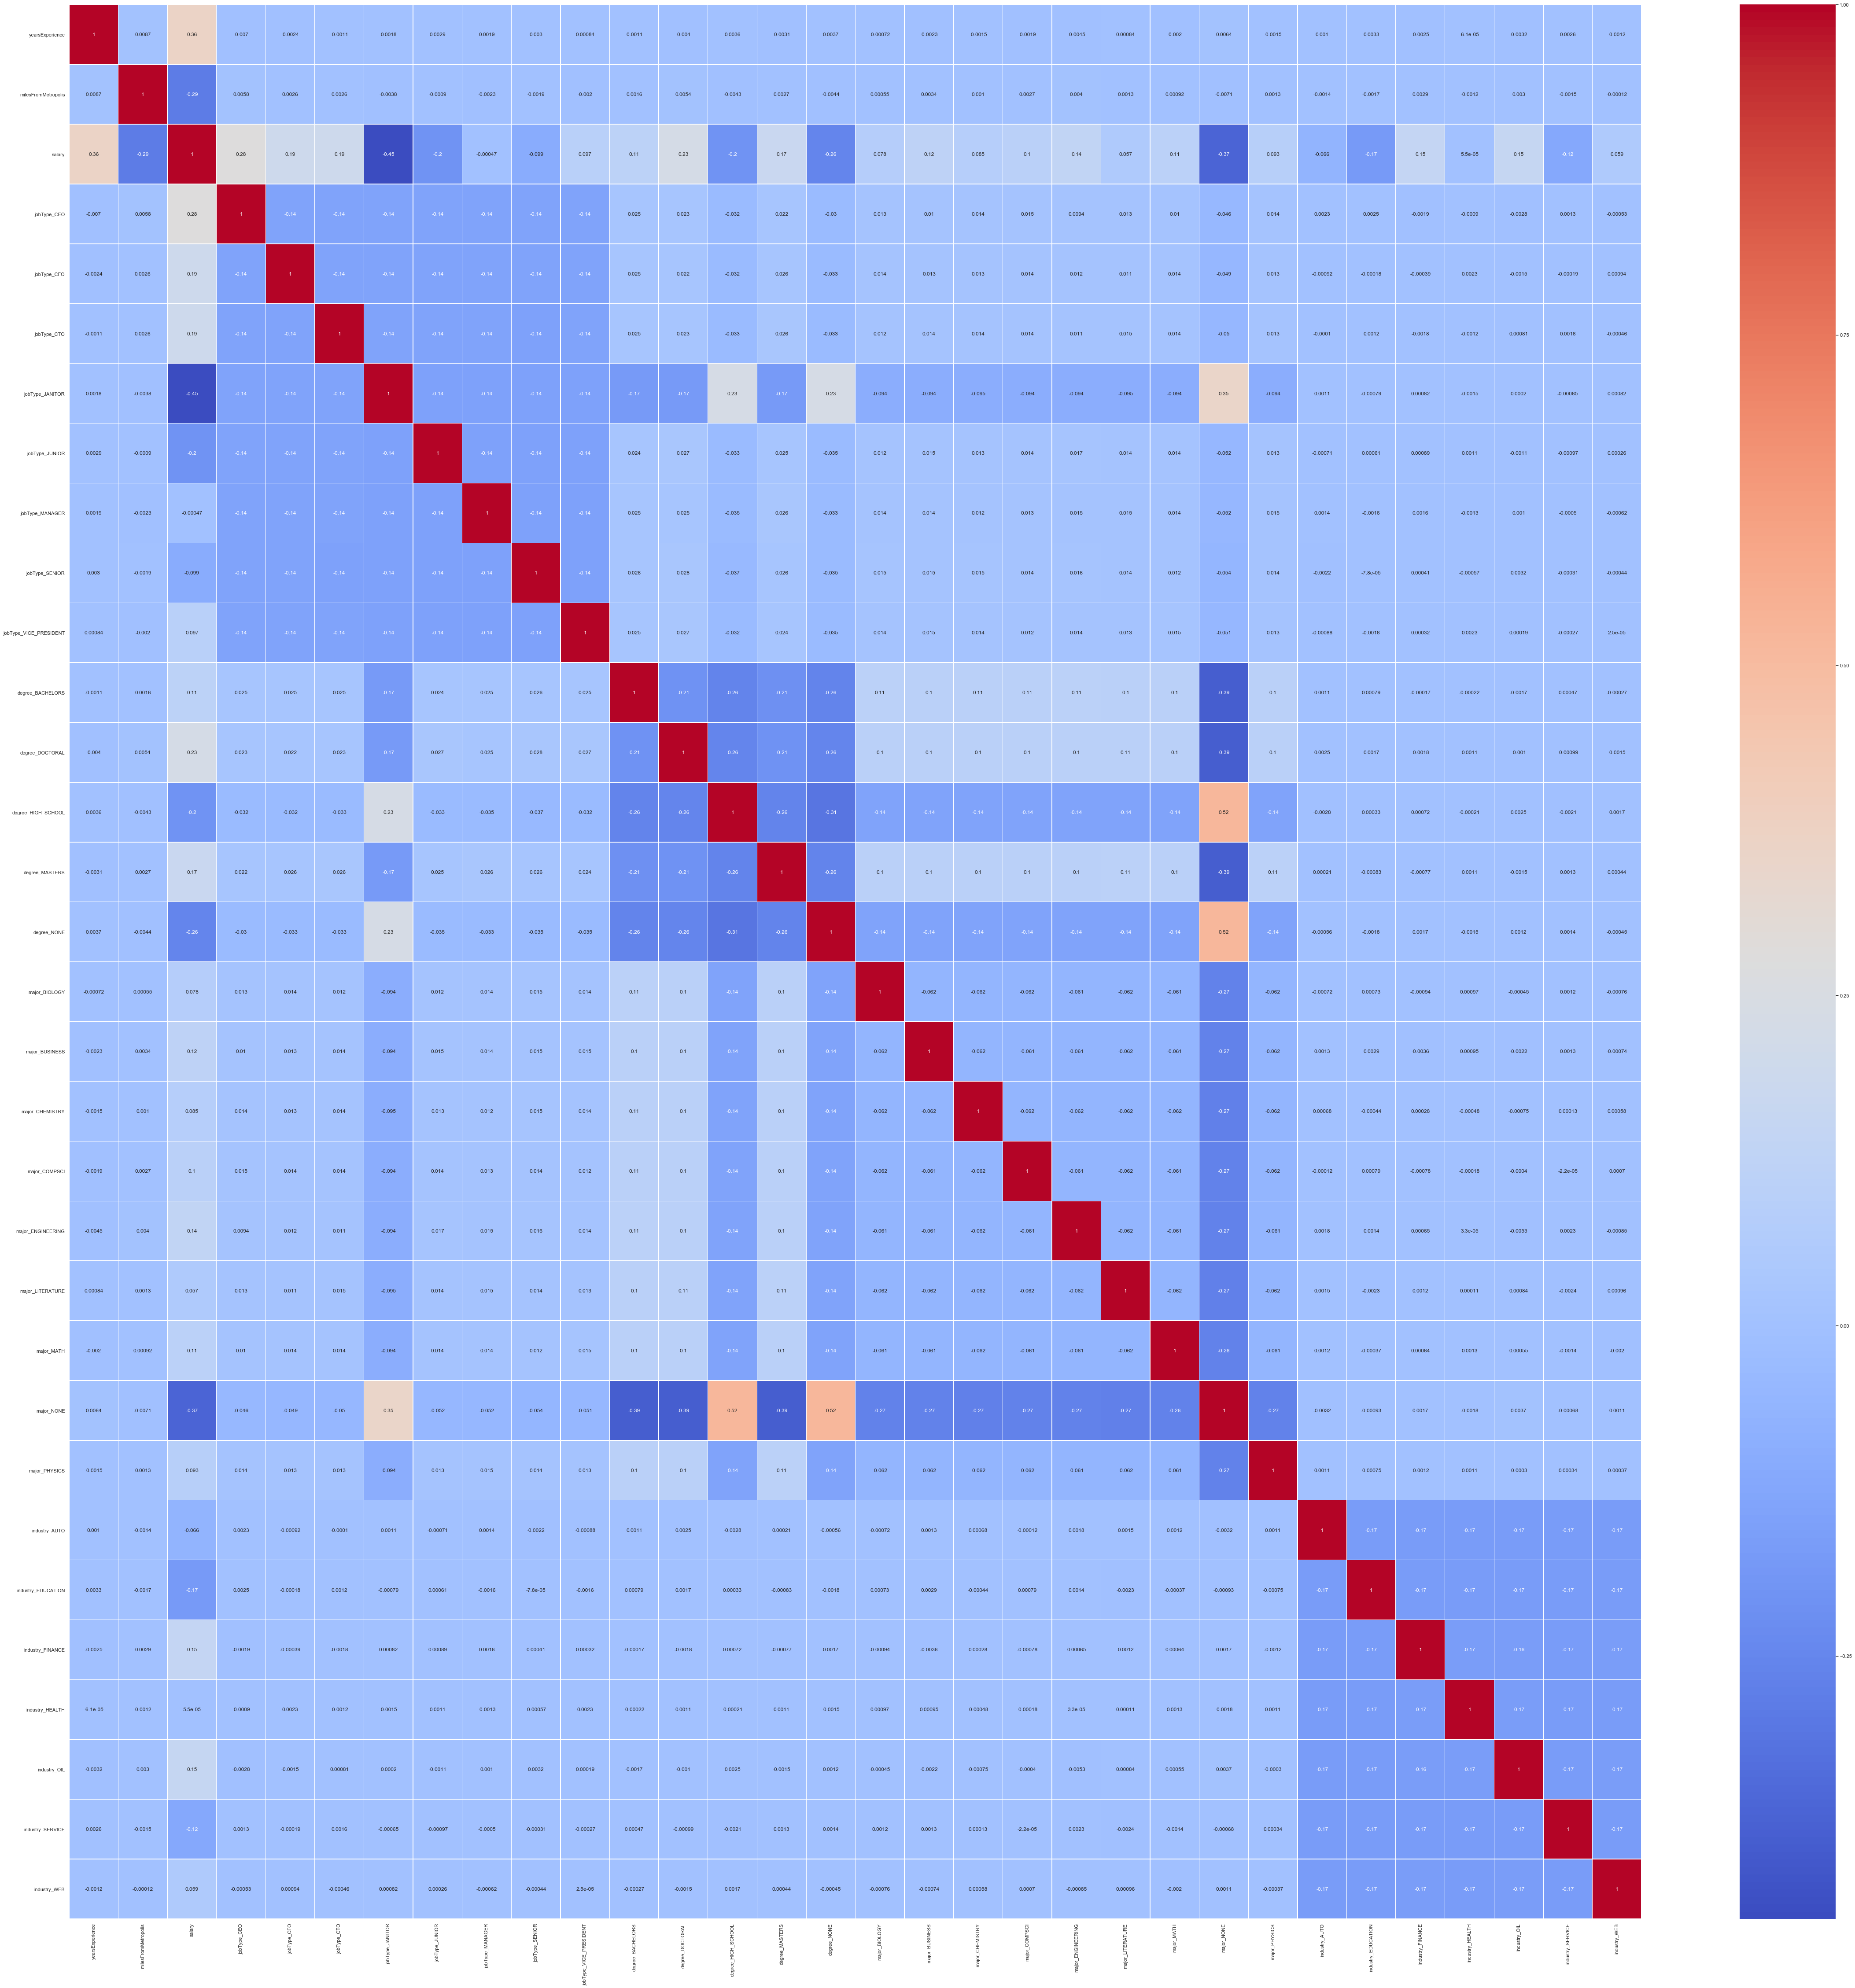

In [151]:
# Using train_df_cat, produce a heatmap to observe the correlation between features.
plt.figure(figsize=(80,80))
c= train_df_cat.corr()
sns.heatmap(c,cmap='coolwarm',annot=True, linewidth=0.5)
c

In [ ]:
#summarize each feature variable
# Finding the relations between the variables.
#summarize the target variable
#look for correlation between each feature and the target
#look for correlation between features

### ---- 5 Establish a baseline ----

In [ ]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [ ]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [ ]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [ ]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [ ]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [ ]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [ ]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [ ]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data